# 주가보기

- pykrx 라이브러리 사용
- 참조: https://github.com/sharebook-kr/pykrx

# 데이터
## import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.rcParams['axes.unicode_minus'] = False
# import matplotlib
# matplotlib.rcParams['figure.figsize'] = (8,6)
# matplotlib.rcParams.update({'font.size': 15})

## 주가 다운로드 라이브러리

In [3]:
! pip install pykrx

## 티커 보기

In [5]:
from pykrx import stock

tickers = stock.get_market_ticker_list("20210901")
print(len(tickers))
tickers[:10]

936


['095570',
 '006840',
 '027410',
 '282330',
 '138930',
 '001460',
 '001465',
 '001040',
 '079160',
 '00104K']

In [6]:
# 최근 날짜 기준
# market: 코스피(KOSPI, 디폴트)/코스닥(KOSDAQ)/코넥스(KONEX)

tickers = stock.get_market_ticker_list(market="KOSDAQ")
print(len(tickers))
tickers[:10]

1528


['060310',
 '054620',
 '265520',
 '211270',
 '013720',
 '035760',
 '051500',
 '058820',
 '023460',
 '056730']

In [7]:
names = []
for ticker in stock.get_market_ticker_list():
        name = stock.get_market_ticker_name(ticker)
        names.append(name)

In [8]:
names[:20]

['AJ네트웍스',
 'AK홀딩스',
 'BGF',
 'BGF리테일',
 'BNK금융지주',
 'BYC',
 'BYC우',
 'CJ',
 'CJ CGV',
 'CJ4우(전환)',
 'CJ대한통운',
 'CJ씨푸드',
 'CJ씨푸드1우',
 'CJ우',
 'CJ제일제당',
 'CJ제일제당 우',
 'CS홀딩스',
 'DB',
 'DB금융투자',
 'DB손해보험']

In [9]:
# OHLCV (삼성전자:005930)
df = stock.get_market_ohlcv_by_date("20210901", "20210910", "005930")
print(df.shape)
df

(8, 5)


시가     고가     저가     종가       거래량
날짜                                              
2021-09-01  76700  77100  75900  76800  16114775
2021-09-02  76800  76800  75700  76000  15347486
2021-09-03  76400  76700  76000  76600  12096419
2021-09-06  76800  77600  76600  77300  12861180
2021-09-07  77100  77100  75900  76100  13239401
2021-09-08  76000  76400  75600  76300  11798147
2021-09-09  76400  76600  75000  75300  17600770
2021-09-10  75300  75600  74800  75300  10103212

In [11]:
# 전종목
df = stock.get_market_ohlcv_by_ticker("20210122")
print(df.shape)
df

(917, 7)


시가      고가      저가      종가      거래량         거래대금    등락률
티커                                                                 
095570    4190    4245    4160    4210   216835    910274405   0.84
006840   25750   29550   25600   29100   727088  20462325950  12.57
027410    5020    5250    4955    5220  1547629   7990770515   4.19
282330  156500  156500  151500  152000    62510   9555364000  -2.56
138930    5720    5720    5610    5610  2094260  11808815750  -2.09
...        ...     ...     ...     ...      ...          ...    ...
069260   23950   23950   23500   23650   231718   5491430700  -0.21
000540    3390    3390    3255    3310   195320    647038720  -3.07
000547   19650   20200   19650   20100      884     17530550   1.52
000545    8260    8480    8190    8260    16510    136239400  -2.02
003280       0       0       0     258        0            0   0.00

[917 rows x 7 columns]

In [12]:
# 종목별 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS'
df = stock.get_market_fundamental_by_ticker("20210901")
df[:12]

BPS        PER       PBR    EPS       DIV   DPS
티커                                                        
095570    6089   0.000000  0.979980      0  3.509766   210
006840   50471   0.000000  0.540039      0  1.450195   400
027410   15781  22.421875  0.399902    285  1.719727   110
282330   40317  25.406250  4.480469   7103  1.330078  2400
138930   26781   5.261719  0.290039   1498  4.058594   320
001460  538911  18.718750  0.759766  21904  0.270020  1100
001465       0   0.000000  0.000000      0  0.660156  1150
001040  130202  39.343750  0.779785   2581  1.969727  2000
079160    3812   0.000000  8.171875      0  0.000000     0
00104K       0   0.000000  0.000000      0  2.359375  2000
000120  146331  29.734375  1.150391   5683  0.000000     0
011150    1823  73.625000  2.339844     58  0.000000     0

In [13]:
# 일자별 거래 대금 (순매수)
df = stock.get_market_trading_value_by_date("20210901", "20210910", "005930")
df[:10]

기관합계         기타법인            개인         외국인합계  전체
날짜                                                                   
2021-09-01  -13635113800   1670136100  -51701712900   63666690600   0
2021-09-02 -155375899200  -3771564800   93363058000   65784406000   0
2021-09-03  -89441655400   6261190200 -106786741000  189967206200   0
2021-09-06    3018001800  -4247639800 -103166779000  104396417000   0
2021-09-07 -108278004100 -14901184500  290362445200 -167183256600   0
2021-09-08  -18962464200   1927595300  -69194017300   86228886200   0
2021-09-09 -258276756400  14279215100  155973895600   88023645700   0
2021-09-10   75542425100   -576559200   22811931800  -97777797700   0

In [14]:
# 일자별 거래 대금 (on: "매도" 또는 "매수")
df = stock.get_market_trading_value_by_date("20210901", "20210910", "005930",  on="매도")
df[:10]

기관합계         기타법인            개인         외국인합계  \
날짜                                                                  
2021-09-01  633701751100   4047283900  399793594500  195863754900   
2021-09-02  706740195600  18597110700  206811923600  236386391873   
2021-09-03  478996506900  13514306200  270874629500  161945671600   
2021-09-06  464329833600  43227721300  395239593000   90244319000   
2021-09-07  505211692100  20300315300  194396624700  288687516550   
2021-09-08  460946525400   1059685300  233956024600  201901963300   
2021-09-09  894650217900   1285009600  218877181100  215159865500   
2021-09-10  343703730700   2340081000  184547851800  229446798100   

                       전체  
날짜                         
2021-09-01  1233406384400  
2021-09-02  1168535621773  
2021-09-03   925331114200  
2021-09-06   993041466900  
2021-09-07  1008596148650  
2021-09-08   897864198600  
2021-09-09  1329972274100  
2021-09-10   760038461600

In [15]:
df.columns

Index(['기관합계', '기타법인', '개인', '외국인합계', '전체'], dtype='object')

# 인덱스 조회

In [17]:
tickers = stock.get_index_ticker_list()
print(len(tickers))
tickers[:10]

47


['1001',
 '1002',
 '1003',
 '1004',
 '1005',
 '1006',
 '1007',
 '1008',
 '1009',
 '1010']

In [18]:
for ticker in tickers[:20]:
    print(ticker, stock.get_index_ticker_name(ticker))

1001 코스피
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1005 음식료품
1006 섬유의복
1007 종이목재
1008 화학
1009 의약품
1010 비금속광물
1011 철강금속
1012 기계
1013 전기전자
1014 의료정밀
1015 운수장비
1016 유통업
1017 전기가스업
1018 건설업
1019 운수창고업
1020 통신업


In [19]:
# 인덱스 구성 종목
pdf = stock.get_index_portfolio_deposit_file("1005")
print(len(pdf))
pdf[:10]

37


['097950',
 '271560',
 '000080',
 '007310',
 '004370',
 '005300',
 '001680',
 '280360',
 '049770',
 '145990']

In [20]:
for t in pdf:
    print(stock.get_market_ticker_name(t))

CJ제일제당
오리온
하이트진로
오뚜기
농심
롯데칠성
대상
롯데제과
동원F&B
삼양사
풀무원
SPC삼립
삼양식품
빙그레
롯데푸드
남양유업
대한제당
선진
대한제분
사조대림
무학
해태제과식품
팜스코
샘표식품
사조동아원
CJ씨푸드
크라운제과
보해양조
조흥
서울식품
우성
사조오양
사조씨푸드
고려산업
MH에탄올
마니커
한성기업


In [21]:
# 리스트로 만들기
list(map(stock.get_market_ticker_name, pdf))

['CJ제일제당',
 '오리온',
 '하이트진로',
 '오뚜기',
 '농심',
 '롯데칠성',
 '대상',
 '롯데제과',
 '동원F&B',
 '삼양사',
 '풀무원',
 'SPC삼립',
 '삼양식품',
 '빙그레',
 '롯데푸드',
 '남양유업',
 '대한제당',
 '선진',
 '대한제분',
 '사조대림',
 '무학',
 '해태제과식품',
 '팜스코',
 '샘표식품',
 '사조동아원',
 'CJ씨푸드',
 '크라운제과',
 '보해양조',
 '조흥',
 '서울식품',
 '우성',
 '사조오양',
 '사조씨푸드',
 '고려산업',
 'MH에탄올',
 '마니커',
 '한성기업']

In [22]:
# "코스피 200" 인덱스의 OHLCV 조회
df = stock.get_index_ohlcv_by_date("20210901", "20210910", "1028")
df

시가      고가      저가      종가        거래량            거래대금
날짜                                                                   
2021-09-01  419.17  421.31  417.16  419.92  151585722   8969220512137
2021-09-02  419.19  420.20  414.99  415.89  146860591   8446853806501
2021-09-03  417.67  419.78  416.40  419.22  147690743   9043385838533
2021-09-06  418.99  420.74  417.85  420.37  151551858   7650828431395
2021-09-07  419.85  419.88  416.28  417.80  134459894   7267997603156
2021-09-08  416.35  417.62  413.34  414.54  182486549  11652973247469
2021-09-09  411.98  413.64  406.68  407.28  189640520  12161359667875
2021-09-10  407.99  409.78  405.99  408.70  145028011   9693995198028

## 공매도 현황

In [23]:
df = stock.get_shorting_status_by_date("20210901", "20210910", "005930")
df

거래량     잔고수량         거래대금          잔고금액
날짜                                                     
2021-09-01   192885  1353520  14773955800  103950336000
2021-09-02   108054  1582933   8223382800  120302908000
2021-09-03  1067654  1503206  81683289100  115145579600
2021-09-06   121533  1296895   9382226900  100249983500
2021-09-07   170488  1352232  12979690700  102904855200
2021-09-08   145111   779390  11045477000   59467457000
2021-09-09   169427  1651362  12790952000  124347558600
2021-09-10    96971  1521199   7296316600  114546284700

In [24]:
# 종목별 공매도
df = stock.get_shorting_volume_by_ticker("20210901")
df[:10]


공매도      매수    비중
티커                         
095570      3  107862  0.00
006840      1   28064  0.00
027410     47  110182  0.04
282330    903   19851  4.55
138930  26296  794183  3.31
001460      0     406  0.00
001465      0     307  0.00
001040   1816   54037  3.36
079160  32146  882043  3.64
00104K      9    1880  0.48

## ETF 티커

In [25]:
tickers = stock.get_etf_ticker_list("20200717")
tickers[:5]

['292340', '159800', '285000', '287300', '287310']

In [26]:
for t in tickers:
    print(stock.get_etf_ticker_name(t))

마이티 200커버드콜ATM레버리지
마이티 코스피100
KBSTAR 200IT
KBSTAR 200건설
KBSTAR 200경기소비재
KBSTAR 200고배당커버드콜ATM
KBSTAR 200금융
KBSTAR 200산업재
KBSTAR 200생활소비재
KBSTAR 200선물레버리지
KBSTAR 200선물인버스2X
KBSTAR 200선물인버스
KBSTAR 200에너지화학
KBSTAR 200중공업
KBSTAR 200
KBSTAR 200철강소재
KBSTAR 200커뮤니케이션서비스
KBSTAR 5대그룹주
KBSTAR ESG사회책임투자
KBSTAR IT플러스
KBSTAR KQ고배당
KBSTAR KRX300레버리지
KBSTAR KRX300미국달러선물혼합
KBSTAR KRX300
KBSTAR KRX국채선물3년10년스티프너2X
KBSTAR KRX국채선물3년10년스티프너
KBSTAR KRX국채선물3년10년플래트너2X
KBSTAR KRX국채선물3년10년플래트너
KBSTAR V&S셀렉트밸류
KBSTAR V&S셀렉트밸류채권혼합
KBSTAR 게임테마
KBSTAR 고배당
KBSTAR 국고채3년선물인버스
KBSTAR 국고채3년
KBSTAR 국채선물10년인버스
KBSTAR 국채선물10년
KBSTAR 글로벌4차산업IT(합성 H)
KBSTAR 금융채액티브
KBSTAR 내수주플러스
KBSTAR 단기국공채액티브
KBSTAR 단기통안채
KBSTAR 대형고배당10TR
KBSTAR 모멘텀로우볼
KBSTAR 모멘텀밸류
KBSTAR 미국S&P원유생산기업(합성 H)
KBSTAR 미국고정배당우선증권ICE TR
KBSTAR 미국장기국채선물레버리지(합성 H)
KBSTAR 미국장기국채선물인버스2X(합성 H)
KBSTAR 미국장기국채선물인버스(H)
KBSTAR 미국장기국채선물(H)
KBSTAR 수출주
KBSTAR 우량업종
KBSTAR 주식혼합
KBSTAR 중국MSCI China(H)
KBSTAR 중국본토대형주CSI100
KBSTAR 중기우량회사채
KBSTAR 중소형고배당
KBSTAR 중장기국공채액티브
KBSTAR 차이나HS

In [27]:
# 리스트로 만들기
etf_list = list(map(stock.get_etf_ticker_name, tickers))
etf_list[:10]

['마이티 200커버드콜ATM레버리지',
 '마이티 코스피100',
 'KBSTAR 200IT',
 'KBSTAR 200건설',
 'KBSTAR 200경기소비재',
 'KBSTAR 200고배당커버드콜ATM',
 'KBSTAR 200금융',
 'KBSTAR 200산업재',
 'KBSTAR 200생활소비재',
 'KBSTAR 200선물레버리지']

In [28]:
# ETF OHLCV
df = stock.get_etf_ohlcv_by_date("20210901", "20210910", "292340")
df


NAV     시가     고가     저가     종가  거래량     거래대금     기초지수
날짜                                                                     
2021-09-01  10977.46  10850  10970  10850  10970  142  1540920  1386.48
2021-09-02  10849.22      0      0      0  10865    0        0  1377.17
2021-09-03  10979.02      0      0      0  10955    0        0  1387.22
2021-09-06  11036.88      0      0      0  11020    0        0  1391.16
2021-09-07  10965.92      0      0      0  10955    0        0  1385.22
2021-09-08  10786.24      0      0      0  10810    0        0  1375.74
2021-09-09  10385.28      0      0      0  10435    0        0  1352.23
2021-09-10  10453.87  10445  10445  10445  10445    6    62670  1355.83

In [29]:
# 전종목 OHLCV
df = stock.get_etf_ohlcv_by_ticker("20210901")
df

NAV      시가      고가      저가      종가    거래량       거래대금      기초지수
티커                                                                           
152100   42713.56   42685   42790   42410   42715   6236  266066880    419.92
295820   12062.01   11990   12090   11990   12065    523    6293640   2632.17
253150   48611.60   48280   48860   47995   48675   1248   60460585   2105.21
253160    4001.44    3940    4045    3940    3985  61489  245268510   2105.21
395750    9839.15    9825    9850    9750    9845    917    8990200   1543.48
...           ...     ...     ...     ...     ...    ...        ...       ...
159800   31982.45       0       0       0   31680      0          0   3170.17
152870   43285.92   43165   43350   42980   43295     52    2246555    419.92
192720   32042.68   31610   31990   31610   31915     81    2584710   3225.93
176710  100458.01  100470  100470  100470  100470     65    6530550  10737.34
140950   32481.55   32450   32590   32345   32530     42    1363715   3170.17

[502 rows x 8 columns]

In [30]:
# PDF
# ARIRANG 200(152100)의 PDF
df = stock.get_etf_portfolio_deposit_file("152100")
df

계약수         금액     비중
티커                              
005930  7855.0  549064500  27.93
000660   934.0  100405000   5.01
035420   211.0   85877000   4.35
035720   526.0   66013000   3.36
006400    86.0   64758000   3.25
...        ...        ...    ...
002350    54.0     390960   0.02
071840    14.0     362600   0.02
284740     9.0     348750   0.02
192400    11.0     212300   0.01
           0.0          0   1.89

[199 rows x 3 columns]

# 수익률 구하기
- 단순 수익률 ($P_t$ : 자산가격)

> $R_t = {P_t \over P_{t-1}} - 1$

- 로그 수익률

> $r_t = log(P_t) - log(P_{t-1})$

In [31]:
# OHLCV (삼성전자)
df = stock.get_market_ohlcv_by_date("20100101", "20201231", "005930")
print(df.shape)
df

(2714, 5)


시가     고가     저가     종가       거래량
날짜                                              
2010-01-04  16060  16180  16000  16180    239271
2010-01-05  16520  16580  16300  16440    559219
2010-01-06  16580  16820  16520  16820    459755
2010-01-07  16820  16820  16260  16260    443237
2010-01-08  16400  16420  16120  16420    295798
...           ...    ...    ...    ...       ...
2020-12-23  72400  74000  72300  73900  19411326
2020-12-24  74100  78800  74000  77800  32502870
2020-12-28  79000  80100  78200  78700  40085044
2020-12-29  78800  78900  77300  78300  30339449
2020-12-30  77400  81300  77300  81000  29417421

[2714 rows x 5 columns]

In [32]:
df.isnull().sum()

시가     0
고가     0
저가     0
종가     0
거래량    0
dtype: int64

In [34]:
# 퍼센트 변화률 보기
df["수익률"]=df["종가"].pct_change()
df[:5]

시가     고가     저가     종가     거래량       수익률
날짜                                                      
2010-01-04  16060  16180  16000  16180  239271       NaN
2010-01-05  16520  16580  16300  16440  559219  0.016069
2010-01-06  16580  16820  16520  16820  459755  0.023114
2010-01-07  16820  16820  16260  16260  443237 -0.033294
2010-01-08  16400  16420  16120  16420  295798  0.009840

In [35]:
df["수익률log"]=np.log(df["종가"]/df["종가"].shift(1))
df[:5]

시가     고가     저가     종가     거래량       수익률    수익률log
날짜                                                                
2010-01-04  16060  16180  16000  16180  239271       NaN       NaN
2010-01-05  16520  16580  16300  16440  559219  0.016069  0.015941
2010-01-06  16580  16820  16520  16820  459755  0.023114  0.022851
2010-01-07  16820  16820  16260  16260  443237 -0.033294 -0.033861
2010-01-08  16400  16420  16120  16420  295798  0.009840  0.009792

In [36]:
# plt.rcParams["figure.dpi"] = 100

<AxesSubplot:xlabel='날짜'>

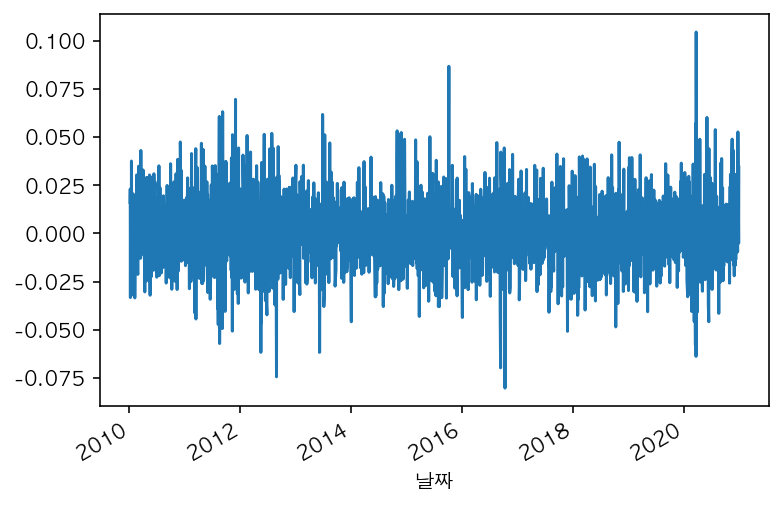

In [40]:
df["수익률"].plot()

<AxesSubplot:xlabel='날짜'>

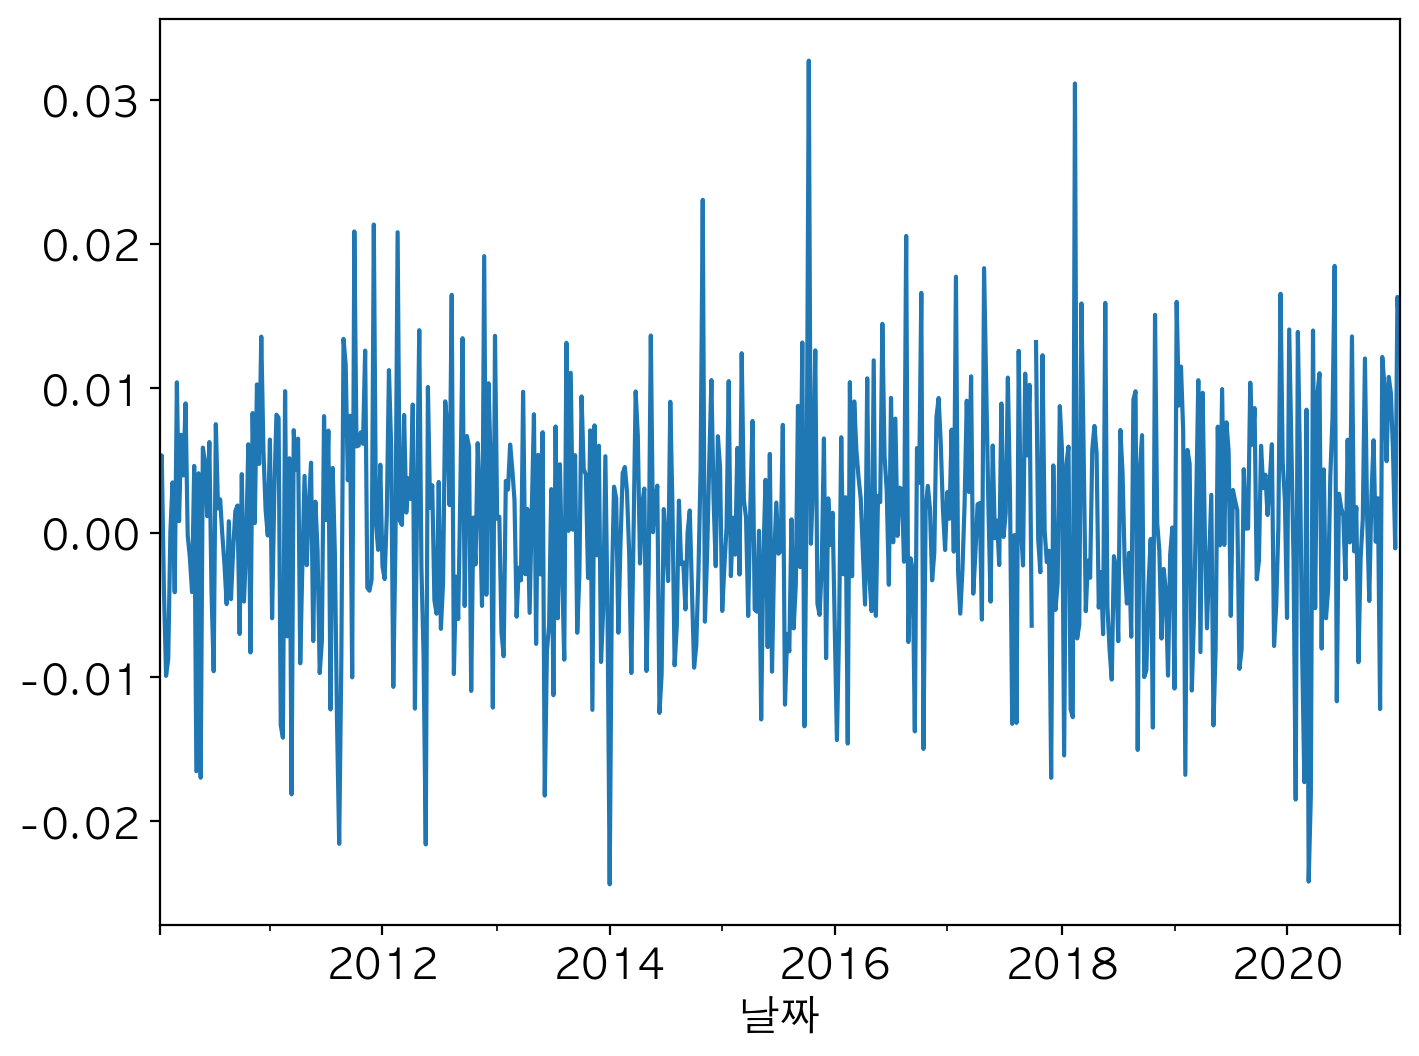

In [34]:
# 주평균 수익률
df["수익률"].resample("W").mean().plot()

<AxesSubplot:xlabel='날짜'>

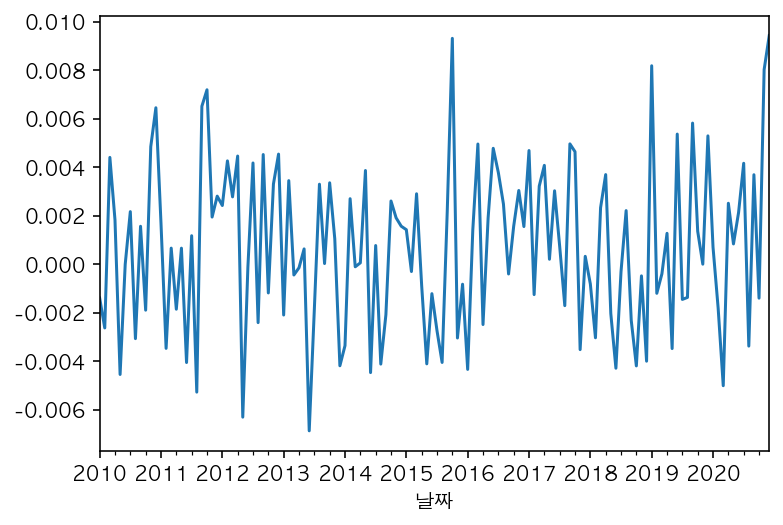

In [42]:
# 월평균 수익률
df["수익률"].resample("M").mean().plot()

# 시각화
- plotly (상호작용 인터페이스)
- cufflinks (데이터프레임에서 plotly를 시각화, iplot 사용)

[Text(0.5, 0, '날짜'), Text(0, 0.5, '수익률log')]

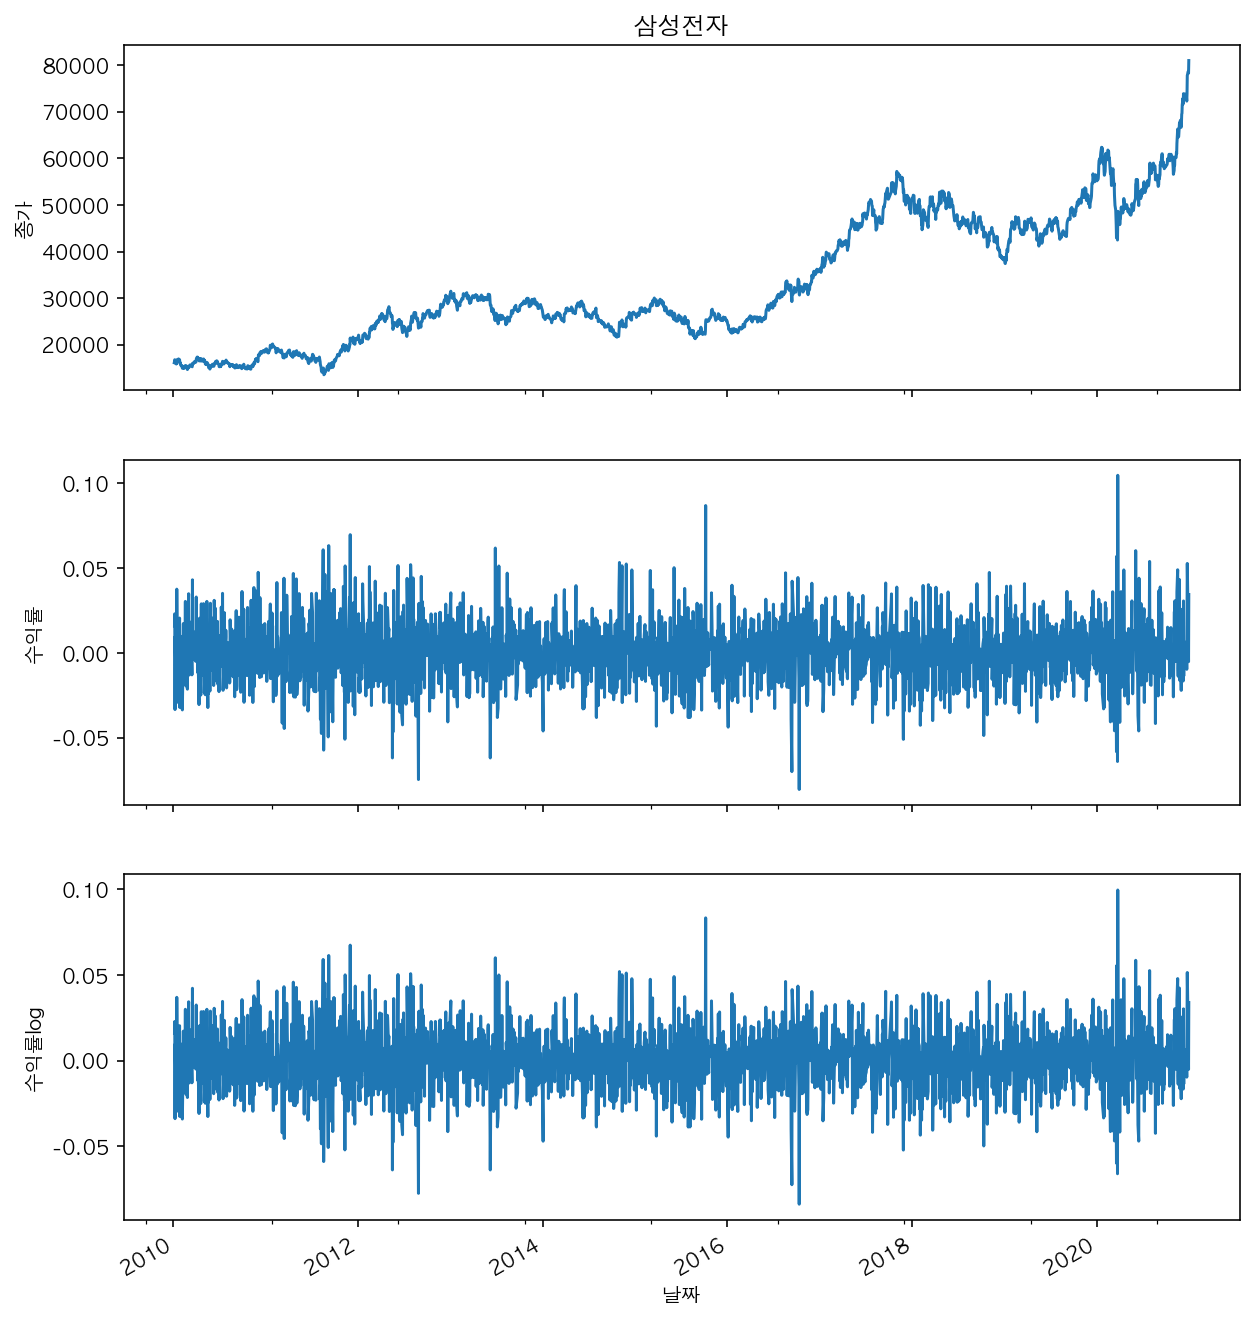

In [43]:
fig, ax = plt.subplots(3,1, figsize=(10,12), sharex=True)
df['종가'].plot(ax=ax[0])
ax[0].set(title="삼성전자",
    ylabel="종가")

df['수익률'].plot(ax=ax[1])
ax[1].set(ylabel="수익률")

df['수익률log'].plot(ax=ax[2])
ax[2].set(xlabel='날짜',
    ylabel="수익률log")

In [44]:
!pip install cufflinks

In [45]:
import cufflinks as cf

In [46]:
from plotly.offline import iplot, init_notebook_mode
cf.set_config_file(world_readable=True, offline=True)
init_notebook_mode()

In [47]:
df.columns

Index(['시가', '고가', '저가', '종가', '거래량', '수익률', '수익률log'], dtype='object')

In [48]:
df[['종가', '수익률', '수익률log']].iplot(subplots=True, shape=(3,1), 
                                shared_xaxes=True,
                                 title='삼성전자')

# 이상치 탐지
- outlier detection

In [49]:
df2 = df[["수익률"]]
df2

수익률
날짜                  
2010-01-04       NaN
2010-01-05  0.016069
2010-01-06  0.023114
2010-01-07 -0.033294
2010-01-08  0.009840
...              ...
2020-12-23  0.022130
2020-12-24  0.052774
2020-12-28  0.011568
2020-12-29 -0.005083
2020-12-30  0.034483

[2714 rows x 1 columns]

In [50]:
df3=df2.copy()

## 수익률의 절대값으로 이상치 찾기

In [51]:
df3["outlier"] = np.abs(df3["수익률"]) > 0.05
df3

수익률  outlier
날짜                           
2010-01-04       NaN    False
2010-01-05  0.016069    False
2010-01-06  0.023114    False
2010-01-07 -0.033294    False
2010-01-08  0.009840    False
...              ...      ...
2020-12-23  0.022130    False
2020-12-24  0.052774     True
2020-12-28  0.011568    False
2020-12-29 -0.005083    False
2020-12-30  0.034483    False

[2714 rows x 2 columns]

In [52]:
outliers = df3.loc[df3["outlier"]==True, ['수익률']]
outliers.index

DatetimeIndex(['2011-08-16', '2011-08-18', '2011-09-07', '2011-11-10',
               '2011-11-11', '2011-12-01', '2012-02-15', '2012-05-16',
               '2012-06-07', '2012-07-27', '2012-08-27', '2013-06-07',
               '2013-06-27', '2013-07-11', '2014-10-31', '2014-11-10',
               '2014-11-27', '2015-06-04', '2015-10-07', '2016-09-12',
               '2016-10-11', '2017-11-27', '2020-03-19', '2020-03-20',
               '2020-03-23', '2020-03-24', '2020-06-03', '2020-07-28',
               '2020-12-24'],
              dtype='datetime64[ns]', name='날짜', freq=None)

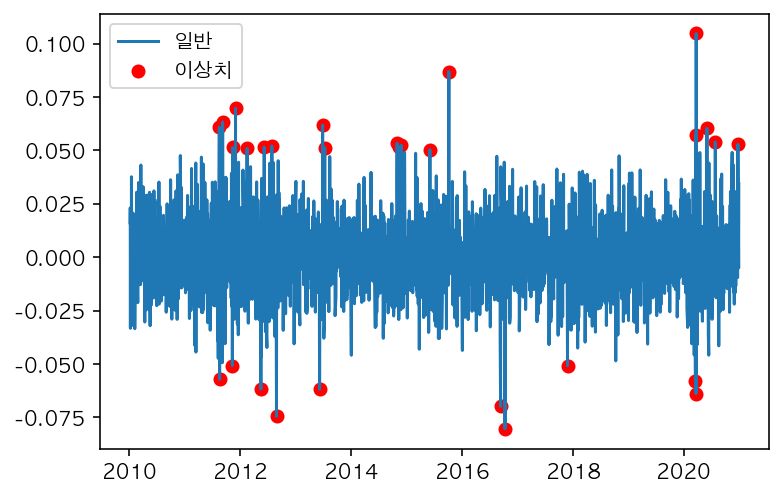

In [53]:
plt.plot(df3["수익률"], label="일반")
plt.scatter(outliers.index, outliers["수익률"], c="r", label="이상치")
plt.legend()

## 이동평균, 이동편차를 고려한 이상치 찾기
- 한달 이동 평균 사용 (window=21)

In [54]:
df_rolling = df2.rolling(window=21, min_periods=1).agg(["mean", "std"])
df_rolling

수익률          
                mean       std
날짜                            
2010-01-04       NaN       NaN
2010-01-05  0.016069       NaN
2010-01-06  0.019592  0.004982
2010-01-07  0.001963  0.030736
2010-01-08  0.003932  0.025403
...              ...       ...
2020-12-23  0.004297  0.015631
2020-12-24  0.007584  0.018149
2020-12-28  0.007134  0.017914
2020-12-29  0.006752  0.018093
2020-12-30  0.009441  0.017802

[2714 rows x 2 columns]

In [55]:
df_rolling.columns = df_rolling.columns.droplevel()
df_rolling

mean       std
날짜                            
2010-01-04       NaN       NaN
2010-01-05  0.016069       NaN
2010-01-06  0.019592  0.004982
2010-01-07  0.001963  0.030736
2010-01-08  0.003932  0.025403
...              ...       ...
2020-12-23  0.004297  0.015631
2020-12-24  0.007584  0.018149
2020-12-28  0.007134  0.017914
2020-12-29  0.006752  0.018093
2020-12-30  0.009441  0.017802

[2714 rows x 2 columns]

In [56]:
df3 = df2.join(df_rolling)
df3

수익률      mean       std
날짜                                      
2010-01-04       NaN       NaN       NaN
2010-01-05  0.016069  0.016069       NaN
2010-01-06  0.023114  0.019592  0.004982
2010-01-07 -0.033294  0.001963  0.030736
2010-01-08  0.009840  0.003932  0.025403
...              ...       ...       ...
2020-12-23  0.022130  0.004297  0.015631
2020-12-24  0.052774  0.007584  0.018149
2020-12-28  0.011568  0.007134  0.017914
2020-12-29 -0.005083  0.006752  0.018093
2020-12-30  0.034483  0.009441  0.017802

[2714 rows x 3 columns]

In [57]:
# 2.5 시그마 기준
df3["outlier"] = np.abs(df3["수익률"] - df3["mean"]) > 2.5*df3["std"]
df3

수익률      mean       std  outlier
날짜                                               
2010-01-04       NaN       NaN       NaN    False
2010-01-05  0.016069  0.016069       NaN    False
2010-01-06  0.023114  0.019592  0.004982    False
2010-01-07 -0.033294  0.001963  0.030736    False
2010-01-08  0.009840  0.003932  0.025403    False
...              ...       ...       ...      ...
2020-12-23  0.022130  0.004297  0.015631    False
2020-12-24  0.052774  0.007584  0.018149    False
2020-12-28  0.011568  0.007134  0.017914    False
2020-12-29 -0.005083  0.006752  0.018093    False
2020-12-30  0.034483  0.009441  0.017802    False

[2714 rows x 4 columns]

In [58]:
(df3["outlier"]==True).sum()

34

In [59]:
outliers = df3.loc[df3["outlier"]==True, ['수익률']]
outliers

수익률
날짜                  
2011-04-20  0.046857
2011-08-16  0.060820
2011-11-10 -0.050761
2012-05-16 -0.061785
2012-08-27 -0.074510
2012-10-10 -0.034257
2012-12-21 -0.040585
2013-06-07 -0.061801
2013-06-27  0.061856
2013-08-13  0.047078
2014-01-02 -0.045918
2014-03-26  0.030473
2014-03-27  0.037354
2014-05-12  0.039700
2014-07-31 -0.037276
2015-03-02  0.048637
2015-06-04  0.050275
2015-10-07  0.086881
2016-01-04 -0.043651
2016-01-19  0.039964
2016-08-18  0.047254
2016-09-12 -0.069841
2017-03-02  0.033299
2017-04-25  0.035403
2017-07-28 -0.040964
2017-09-18  0.041270
2017-09-26 -0.036554
2017-11-27 -0.050847
2019-01-07  0.034713
2019-03-21  0.040863
2019-05-09 -0.040678
2020-03-24  0.104706
2020-06-03  0.060311
2020-07-28  0.053957

In [60]:
outliers.index

DatetimeIndex(['2011-04-20', '2011-08-16', '2011-11-10', '2012-05-16',
               '2012-08-27', '2012-10-10', '2012-12-21', '2013-06-07',
               '2013-06-27', '2013-08-13', '2014-01-02', '2014-03-26',
               '2014-03-27', '2014-05-12', '2014-07-31', '2015-03-02',
               '2015-06-04', '2015-10-07', '2016-01-04', '2016-01-19',
               '2016-08-18', '2016-09-12', '2017-03-02', '2017-04-25',
               '2017-07-28', '2017-09-18', '2017-09-26', '2017-11-27',
               '2019-01-07', '2019-03-21', '2019-05-09', '2020-03-24',
               '2020-06-03', '2020-07-28'],
              dtype='datetime64[ns]', name='날짜', freq=None)

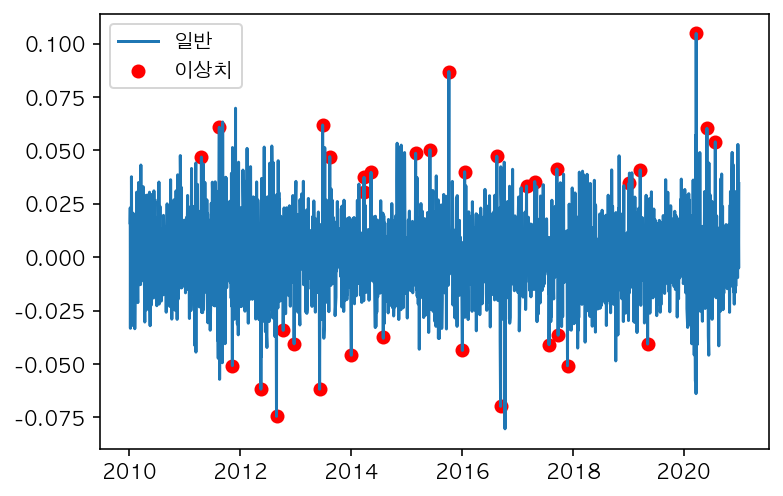

In [61]:
plt.plot(df3["수익률"], label="일반")
plt.scatter(outliers.index, outliers["수익률"], c="r", label="이상치")
plt.legend()

## 수익률 변동성

In [62]:
df

시가     고가     저가     종가       거래량       수익률    수익률log
날짜                                                                  
2010-01-04  16060  16180  16000  16180    239271       NaN       NaN
2010-01-05  16520  16580  16300  16440    559219  0.016069  0.015941
2010-01-06  16580  16820  16520  16820    459755  0.023114  0.022851
2010-01-07  16820  16820  16260  16260    443237 -0.033294 -0.033861
2010-01-08  16400  16420  16120  16420    295798  0.009840  0.009792
...           ...    ...    ...    ...       ...       ...       ...
2020-12-23  72400  74000  72300  73900  19411326  0.022130  0.021889
2020-12-24  74100  78800  74000  77800  32502870  0.052774  0.051429
2020-12-28  79000  80100  78200  78700  40085044  0.011568  0.011502
2020-12-29  78800  78900  77300  78300  30339449 -0.005083 -0.005096
2020-12-30  77400  81300  77300  81000  29417421  0.034483  0.033902

[2714 rows x 7 columns]

In [63]:
df['std252'] = df['수익률log'].rolling(window=252).std()
df['std21'] = df['수익률log'].rolling(window=21).std()

In [64]:
df

시가     고가     저가     종가       거래량       수익률    수익률log  \
날짜                                                                     
2010-01-04  16060  16180  16000  16180    239271       NaN       NaN   
2010-01-05  16520  16580  16300  16440    559219  0.016069  0.015941   
2010-01-06  16580  16820  16520  16820    459755  0.023114  0.022851   
2010-01-07  16820  16820  16260  16260    443237 -0.033294 -0.033861   
2010-01-08  16400  16420  16120  16420    295798  0.009840  0.009792   
...           ...    ...    ...    ...       ...       ...       ...   
2020-12-23  72400  74000  72300  73900  19411326  0.022130  0.021889   
2020-12-24  74100  78800  74000  77800  32502870  0.052774  0.051429   
2020-12-28  79000  80100  78200  78700  40085044  0.011568  0.011502   
2020-12-29  78800  78900  77300  78300  30339449 -0.005083 -0.005096   
2020-12-30  77400  81300  77300  81000  29417421  0.034483  0.033902   

              std252     std21  
날짜                              
2010-01-04       NaN       NaN  
2010-01-05       NaN       NaN  
2010-01-06       NaN       NaN  
2010-01-07       NaN       NaN  
2010-01-08       NaN       NaN  
...              ...       ...  
2020-12-23  0.020439  0.015556  
2020-12-24  0.020677  0.017932  
2020-12-28  0.020683  0.017698  
2020-12-29  0.020686  0.017875  
2020-12-30  0.020777  0.017545  

[2714 rows x 9 columns]

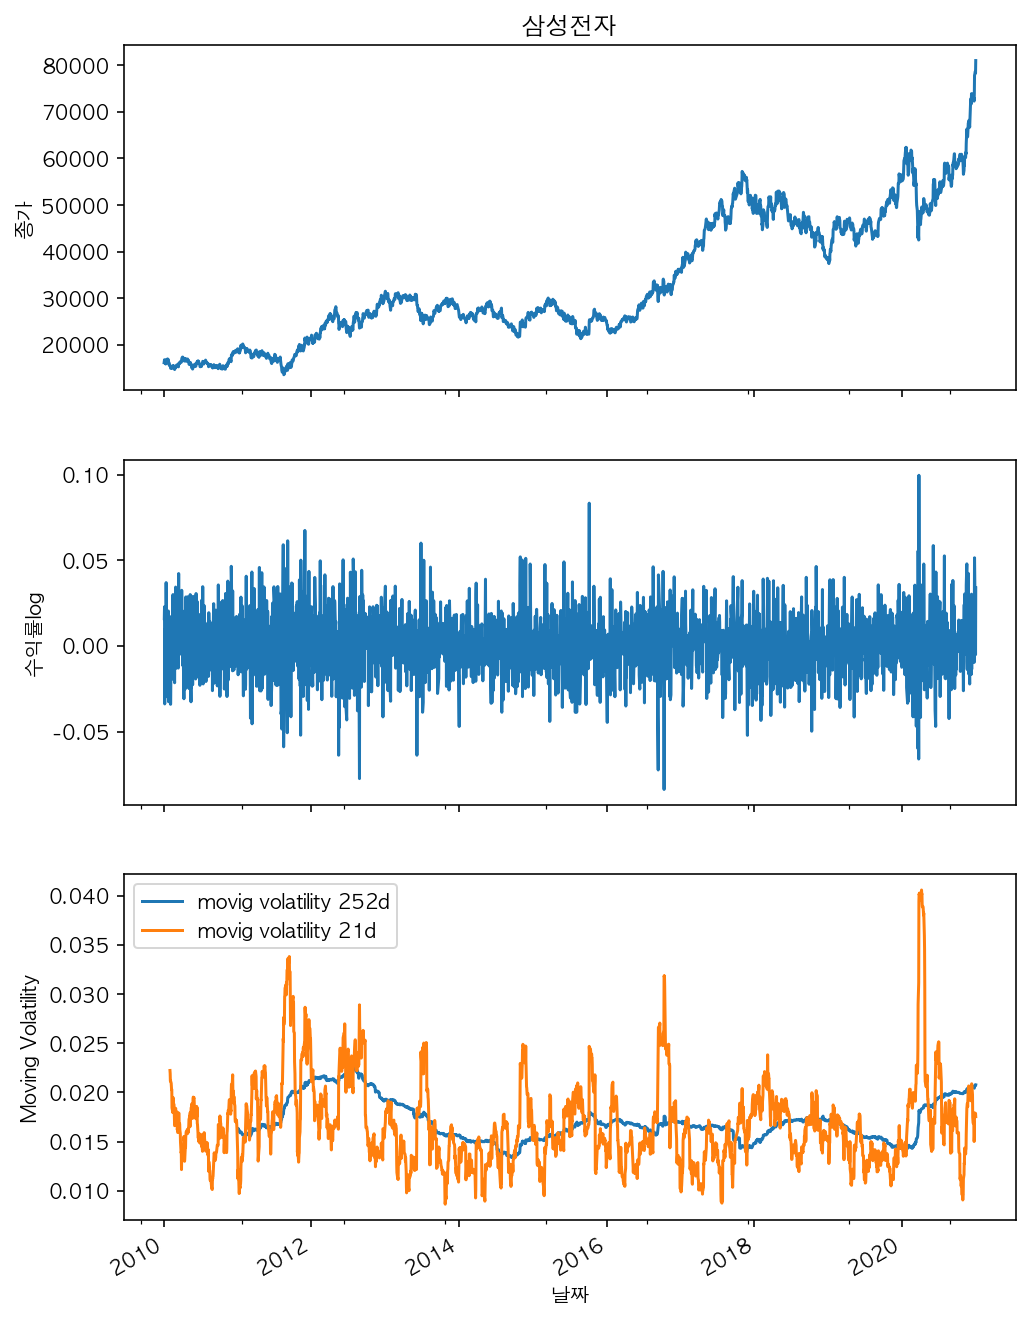

In [65]:
fig, ax = plt.subplots(3,1, figsize=(8,12), sharex=True)

df['종가'].plot(ax=ax[0])
ax[0].set(title='삼성전자', ylabel='종가')

df['수익률log'].plot(ax=ax[1])
ax[1].set(ylabel='수익률log')

df['std252'].plot(ax=ax[2], label='movig volatility 252d')
ax[2].set(ylabel='Moving Volatility')

df['std21'].plot(ax=ax[2], label='movig volatility 21d')
ax[2].legend()


## Candlestick

In [66]:
# OHLCV (삼성전자)
df = stock.get_market_ohlcv_by_date("20180601", "20201231", "005930")
print(df.shape)
df

(636, 5)


시가     고가     저가     종가       거래량
날짜                                              
2018-06-01  50500  51700  49950  51300  13038499
2018-06-04  50800  51200  50700  51100   9767171
2018-06-05  51100  51400  50400  51300   9144100
2018-06-07  51800  51800  50500  50600  13590016
2018-06-08  50200  50400  49600  49650  16951706
...           ...    ...    ...    ...       ...
2020-12-23  72400  74000  72300  73900  19411326
2020-12-24  74100  78800  74000  77800  32502870
2020-12-28  79000  80100  78200  78700  40085044
2020-12-29  78800  78900  77300  78300  30339449
2020-12-30  77400  81300  77300  81000  29417421

[636 rows x 5 columns]

In [67]:
df.columns= ['open','high','low', 'close', 'volume']
df

open   high    low  close    volume
날짜                                              
2018-06-01  50500  51700  49950  51300  13038499
2018-06-04  50800  51200  50700  51100   9767171
2018-06-05  51100  51400  50400  51300   9144100
2018-06-07  51800  51800  50500  50600  13590016
2018-06-08  50200  50400  49600  49650  16951706
...           ...    ...    ...    ...       ...
2020-12-23  72400  74000  72300  73900  19411326
2020-12-24  74100  78800  74000  77800  32502870
2020-12-28  79000  80100  78200  78700  40085044
2020-12-29  78800  78900  77300  78300  30339449
2020-12-30  77400  81300  77300  81000  29417421

[636 rows x 5 columns]

In [68]:
# Quant Fig
qf = cf.QuantFig(df, title="삼성전자",
                legend='top', name='삼성전자')
qf.add_volume()
qf.add_sma(periods=20, column='close', color='red')
qf.add_ema(periods=20, color='green')
qf.iplot()